<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/c620_transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import joblib
!pip install autorch > log.txt

In [3]:
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c620_col_names.pkl')
c620_df = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
print(c620_df.shape)
c620_df.head(3)

(168, 218)


,Tatoray Stripper C620 Operation_Specifications_Spec 1 : Receiver Temp_oC,Tatoray Stripper C620 Operation_Specifications_Spec 2 : Distillate Rate_m3/hr,Tatoray Stripper C620 Operation_Specifications_Spec 3 : Benzene in Sidedraw_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Hydrogen_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Methane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Ethane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Propane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Butane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Pentane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Hexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Benzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Cyclohexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Heptane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Water_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Toluene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Octane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_p-Xylene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_m-Xylene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_o-Xylene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Nonane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_Indane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",...,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Methylcyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Toluene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_n-Octane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_n-Propylcyclopentane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Ethylcyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Eth

# 缺失欄位

In [12]:
miss_col = c620_df.columns[(c620_df.isnull().sum() > 0).values].tolist()
print(len(miss_col))
miss_col

166


['Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Pentane_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Hexane_Fraction',
 'Tatoray

# 有提供欄位

In [13]:
have_col = c620_df.columns[(c620_df.isnull().sum() == 0).values].tolist()
print(len(have_col))
have_col

52


['Tatoray Stripper C620 Operation_Specifications_Spec 1 : Receiver Temp_oC',
 'Tatoray Stripper C620 Operation_Specifications_Spec 2 : Distillate Rate_m3/hr',
 'Tatoray Stripper C620 Operation_Specifications_Spec 3 : Benzene in Sidedraw_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_Hydrogen_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_Methane_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_Ethane_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_Propane_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Butane_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Pentane_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Hexane_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_Benzene_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_Cyclohexane_wt%',
 'Combined Feed to Tatoray Stripper C620_Detailed Composition_n-H

In [14]:
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']

In [15]:
c620_df[x_col].head()

,Tatoray Stripper C620 Operation_Specifications_Spec 1 : Receiver Temp_oC,Tatoray Stripper C620 Operation_Specifications_Spec 2 : Distillate Rate_m3/hr,Tatoray Stripper C620 Operation_Specifications_Spec 3 : Benzene in Sidedraw_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Hydrogen_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Methane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Ethane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Propane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Butane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Pentane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Hexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Benzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Cyclohexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Heptane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Water_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Toluene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Octane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_p-Xylene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_m-Xylene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_o-Xylene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Nonane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_Indane_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Tatoray Stripper C620_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Tatoray Stripper C620_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Pentylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_n-Hexylbenzene_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Nitrogen_wt%,Combined Feed to Tatoray Stripper C620_Detailed Composition_Oxygen_wt%
2020-09-02,40.670785,0.0,83.631,0,0.019274,0.469690,0.435204,0.134911,0.068302,0.012563,14.741264,0.001656,0.007845,0,0.007084,34.924097,0.007173,0.009680,0.009691,1.050619,7.214699,17.025416,7.844650,0.013065,0.006661,0.001636,0.008142,0.936810,0.490983,2.829603,0.275833,7.227505,0.000002,1.153822,0.037565,0.001119,0.031655,1.223261,0,1.408379,0.259099,0.111042,0,0
2020-09-03,40.668301,0.0,92.050,0,0.021279,0.518545,0.478666,0.146086,0.071325,0.013139,14.746443,0.001701,0.008162,0,0.007242,34.987041,0.007335,0.009893,0.009905,1.0

In [16]:
c620_df[op_col].head()

,Density_Feed Properties,Density_Vent Gas Production Rate and Composition,Density_Distillate Production Rate and Composition,Density_Sidedraw Production Rate and Composition,Density_Bottoms Production Rate and Composition,Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,Tatoray Stripper C620 Operation_Heat Duty_Condenser Heat Duty_Mkcal/hr,Tatoray Stripper C620 Operation_Heat Duty_Reboiler Heat Duty_Mkcal/hr,Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC
2020-09-02,0.871108,0.453,0.852,0.881,0.874,113.302600,NaN,NaN,151.253142,181.026332
2020-09-03,0.870640,0.453,0.858,0.882,0.874,110.343856,NaN,NaN,153.642061,181.012689
2020-09-04,0.866915,0.453,0.853,0.881,0.874,105.019248,NaN,NaN,158.729188,180.954227
2020-09-05,0.868753,0.453,0.850,0.881,0.874,103.301242,NaN,NaN,160.983370,181.090466
2020-09-06,0.870628,0.453,0.852,0.882,0.874,101.660750,NaN,NaN,160.788594,180.523647


In [18]:
y_col = c620_df[op_col].dropna(axis=1).columns.tolist()
y_col

['Density_Feed Properties',
 'Density_Vent Gas Production Rate and Composition',
 'Density_Distillate Production Rate and Composition',
 'Density_Sidedraw Production Rate and Composition',
 'Density_Bottoms Production Rate and Composition',
 'Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr',
 'Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC',
 'Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC']

In [19]:
c620_df[y_col].head()

,Density_Feed Properties,Density_Vent Gas Production Rate and Composition,Density_Distillate Production Rate and Composition,Density_Sidedraw Production Rate and Composition,Density_Bottoms Production Rate and Composition,Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC
2020-09-02,0.871108,0.453,0.852,0.881,0.874,113.302600,151.253142,181.026332
2020-09-03,0.870640,0.453,0.858,0.882,0.874,110.343856,153.642061,181.012689
2020-09-04,0.866915,0.453,0.853,0.881,0.874,105.019248,158.729188,180.954227
2020-09-05,0.868753,0.453,0.850,0.881,0.874,103.301242,160.983370,181.090466
2020-09-06,0.870628,0.453,0.852,0.882,0.874,101.660750,160.788594,180.523647


# 1. 實驗直接訓練 (不使用預訓練模型)

  4%|▎         | 11/300 [00:00<00:57,  5.00it/s]

epoch:0 train_loss:0.0429 valid_loss:0.0267


 21%|██        | 63/300 [00:00<00:09, 23.82it/s]

epoch:50 train_loss:0.0033 valid_loss:0.0051


 38%|███▊      | 114/300 [00:01<00:02, 64.49it/s]

epoch:100 train_loss:0.0027 valid_loss:0.0054


 56%|█████▌    | 167/300 [00:01<00:01, 91.71it/s]

epoch:150 train_loss:0.0022 valid_loss:0.0054


 70%|███████   | 211/300 [00:02<00:00, 98.38it/s] 

epoch:200 train_loss:0.0020 valid_loss:0.0057


 87%|████████▋ | 260/300 [00:03<00:00, 78.95it/s]

epoch:250 train_loss:0.0018 valid_loss:0.0062


100%|██████████| 300/300 [00:03<00:00, 85.38it/s]


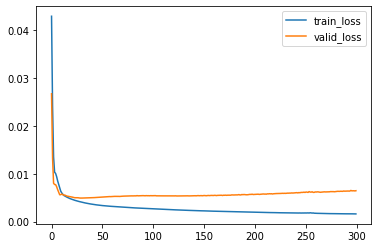

In [20]:
from autorch.utils import PartBulider
c620 = PartBulider(c620_df,x_col,y_col,limit_y_range=True)
c620.train()

In [22]:
c620.test(e=2e-2)

,R2,MSE,MAPE
Density_Feed Properties,0.114673,1.18403e-06,0.102126
Density_Vent Gas Production Rate and Composition,0,7.07559e-05,1.43504
Density_Distillate Production Rate and Composition,0.766711,6.11718e-06,0.241504
Density_Sidedraw Production Rate and Composition,0,3.36955e-07,0.0452931
Density_Bottoms Production Rate and Composition,0.479919,3.20327e-07,0.0629128
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.472425,16.6547,3.32314
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0,5.67314,1.32646
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,1.05781,0.388724
AVG,0.229216,2.92322,0.86565


# 2.使用預訓練模型

2.1 用模擬數據先預訓練一個模型

  0%|          | 1/300 [00:00<03:17,  1.51it/s]

epoch:0 train_loss:0.0052 valid_loss:0.0004


 17%|█▋        | 51/300 [00:37<03:04,  1.35it/s]

epoch:50 train_loss:0.0000 valid_loss:0.0000


 34%|███▎      | 101/300 [01:16<02:35,  1.28it/s]

epoch:100 train_loss:0.0000 valid_loss:0.0000


 50%|█████     | 151/300 [01:56<02:03,  1.21it/s]

epoch:150 train_loss:0.0000 valid_loss:0.0000


 67%|██████▋   | 201/300 [02:40<01:30,  1.09it/s]

epoch:200 train_loss:0.0000 valid_loss:0.0000


 84%|████████▎ | 251/300 [03:29<00:48,  1.00it/s]

epoch:250 train_loss:0.0000 valid_loss:0.0000


100%|██████████| 300/300 [04:20<00:00,  1.15it/s]


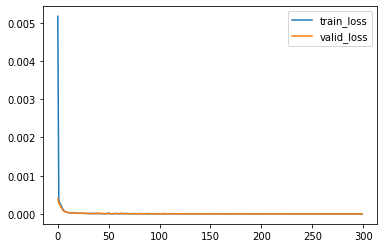

In [23]:
c620_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c620_train.csv',index_col=0).dropna(axis=0)
c620 = PartBulider(c620_df,x_col,y_col,limit_y_range=True)
c620.train()

In [24]:
c620.test(e=2e-2)

,R2,MSE,MAPE
Density_Feed Properties,0.999999,1.84251e-12,0.000132221
Density_Vent Gas Production Rate and Composition,0.999935,1.49103e-09,0.00597531
Density_Distillate Production Rate and Composition,0.999975,2.65317e-09,0.00495871
Density_Sidedraw Production Rate and Composition,0.999996,4.29769e-12,0.000175646
Density_Bottoms Production Rate and Composition,0.999994,1.01903e-13,2.68617e-05
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.999981,0.00249452,0.0301741
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.999994,7.78802e-06,0.00118899
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0.999993,5.14227e-06,0.000809896
AVG,0.999984,0.000313432,0.00543022


2.2 把預訓練好的模型抽出來

In [26]:
import copy
from copy import deepcopy
pretrain_net = deepcopy(c620.net)
pretrain_net

Sequential(
  (0): Linear(in_features=44, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=8, bias=True)
  (5): Sigmoid()
)

2.3 在預訓練模型上丟進真實資料繼續訓練

  7%|▋         | 20/300 [00:00<00:02, 94.35it/s]

epoch:0 train_loss:0.0841 valid_loss:0.0639


 21%|██▏       | 64/300 [00:00<00:02, 83.64it/s]

epoch:50 train_loss:0.0041 valid_loss:0.0041


 37%|███▋      | 112/300 [00:01<00:02, 90.19it/s]

epoch:100 train_loss:0.0031 valid_loss:0.0034


 54%|█████▍    | 163/300 [00:01<00:01, 92.39it/s]

epoch:150 train_loss:0.0026 valid_loss:0.0033


 71%|███████▏  | 214/300 [00:02<00:00, 95.35it/s]

epoch:200 train_loss:0.0022 valid_loss:0.0032


 87%|████████▋ | 260/300 [00:02<00:00, 77.30it/s]

epoch:250 train_loss:0.0018 valid_loss:0.0032


100%|██████████| 300/300 [00:03<00:00, 86.78it/s]


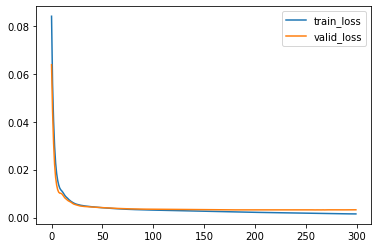

In [28]:
from torch.optim import Adam
c620_df = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
c620 = PartBulider(c620_df,x_col,y_col,limit_y_range=True)
c620.net = pretrain_net
c620.optimizer = Adam(c620.net.parameters(),lr=0.001)
c620.train()

In [29]:
c620.test(e=2e-2)

,R2,MSE,MAPE
Density_Feed Properties,0.0817557,5.06711e-06,0.13722
Density_Vent Gas Production Rate and Composition,0,4.23263e-06,0.391301
Density_Distillate Production Rate and Composition,0.604351,4.46303e-06,0.193896
Density_Sidedraw Production Rate and Composition,0.503192,2.30364e-07,0.0389827
Density_Bottoms Production Rate and Composition,0.370944,3.87446e-07,0.0584379
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.727534,6.31963,1.76351
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.697235,4.41948,1.08096
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0.787747,0.483073,0.310769
AVG,0.471595,1.40277,0.496885


In [30]:
c620.shrink()

In [31]:
joblib.dump(c620,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op_real_data.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_op_real_data.pkl']